# Data Preprocessing

Load Dataset

In [105]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder

# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Social_Network_Ads.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rakeshrau/social-network-ads",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

<ipython-input-105-842e16921dd4>:14: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [106]:
#Check null values
null_count =df.isnull().sum()
null_count

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


Drop the User ID column (not a useful feature).

In [108]:
df.drop(columns=['User ID'],inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


Encode the Gender column using Label Encoding or One-Hot Encoding.

In [109]:
# Apply one-hot encoding to Gender column ,will not use Label encoding as there is no preference

df_encoded = pd.get_dummies(df, ['Gender'],drop_first=True)

In [110]:
df_encoded

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,True
1,35,20000,0,True
2,26,43000,0,False
3,27,57000,0,False
4,19,76000,0,True
...,...,...,...,...
395,46,41000,1,False
396,51,23000,1,True
397,50,20000,1,False
398,36,33000,0,True


Encode the target variable Purchased.

In [111]:
# Apply Label encoding to Purchased column as there is prefence
# Encode Gender
label_encoder = LabelEncoder()
df_encoded['Purchased'] = label_encoder.fit_transform(df_encoded['Purchased'])

In [112]:
df_encoded

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,True
1,35,20000,0,True
2,26,43000,0,False
3,27,57000,0,False
4,19,76000,0,True
...,...,...,...,...
395,46,41000,1,False
396,51,23000,1,True
397,50,20000,1,False
398,36,33000,0,True


Standardize the feature columns (Age, EstimatedSalary).

In [113]:

numeric_features = ['Age', 'EstimatedSalary']
scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])


In [114]:
df_encoded

,Age,EstimatedSalary,Purchased,Gender_Male
0,-1.781797,-1.490046,0,True
1,-0.253587,-1.460681,0,True
2,-1.113206,-0.785290,0,False
3,-1.017692,-0.374182,0,False
4,-1.781797,0.183751,0,True
...,...,...,...,...
395,0.797057,-0.844019,1,False
396,1.274623,-1.372587,1,True
397,1.179110,-1.460681,1,False
398,-0.158074,-1.078938,0,True


# Model Building

Split the dataset into training and test sets (75/25).

Will use only Age and Estimated Salary as the the objective demands :

"Students will predict whether a user purchases a product based on their **age** and **estimated salary** using Naive Bayes, KNN, and Decision Tree classifiers."

In [115]:

X = df_encoded[['Age', 'EstimatedSalary']]
# Target variable to predict
y = df_encoded['Purchased']
X.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [116]:
from sklearn.model_selection import train_test_split

# For Multilinear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


Train the following models:
■ Gaussian Naive Bayes
■ K-Nearest Neighbors (test with k=3, 5, and 7)

■ Decision Tree (try both Gini and Entropy as criteria)

In [117]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize models
models = {
    "GaussianNB": GaussianNB(),
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "KNN (k=7)": KNeighborsClassifier(n_neighbors=7),
    "DecisionTree (Gini)": DecisionTreeClassifier(criterion='gini', random_state=42),
    "DecisionTree (Entropy)": DecisionTreeClassifier(criterion='entropy', random_state=42)
}


# Model Evaluation

Evaluate all models using:


Model: GaussianNB
Accuracy: 0.93
Precision: 0.94
Recall: 0.86
F1 Score: 0.90
Confusion Matrix:
 [[61  2]
 [ 5 32]]

Model: KNN (k=3)
Accuracy: 0.92
Precision: 0.89
Recall: 0.89
F1 Score: 0.89
Confusion Matrix:
 [[59  4]
 [ 4 33]]

Model: KNN (k=5)
Accuracy: 0.93
Precision: 0.89
Recall: 0.92
F1 Score: 0.91
Confusion Matrix:
 [[59  4]
 [ 3 34]]

Model: KNN (k=7)
Accuracy: 0.93
Precision: 0.88
Recall: 0.95
F1 Score: 0.91
Confusion Matrix:
 [[58  5]
 [ 2 35]]

Model: DecisionTree (Gini)
Accuracy: 0.83
Precision: 0.78
Recall: 0.76
F1 Score: 0.77
Confusion Matrix:
 [[55  8]
 [ 9 28]]

Model: DecisionTree (Entropy)
Accuracy: 0.83
Precision: 0.78
Recall: 0.76
F1 Score: 0.77
Confusion Matrix:
 [[55  8]
 [ 9 28]]


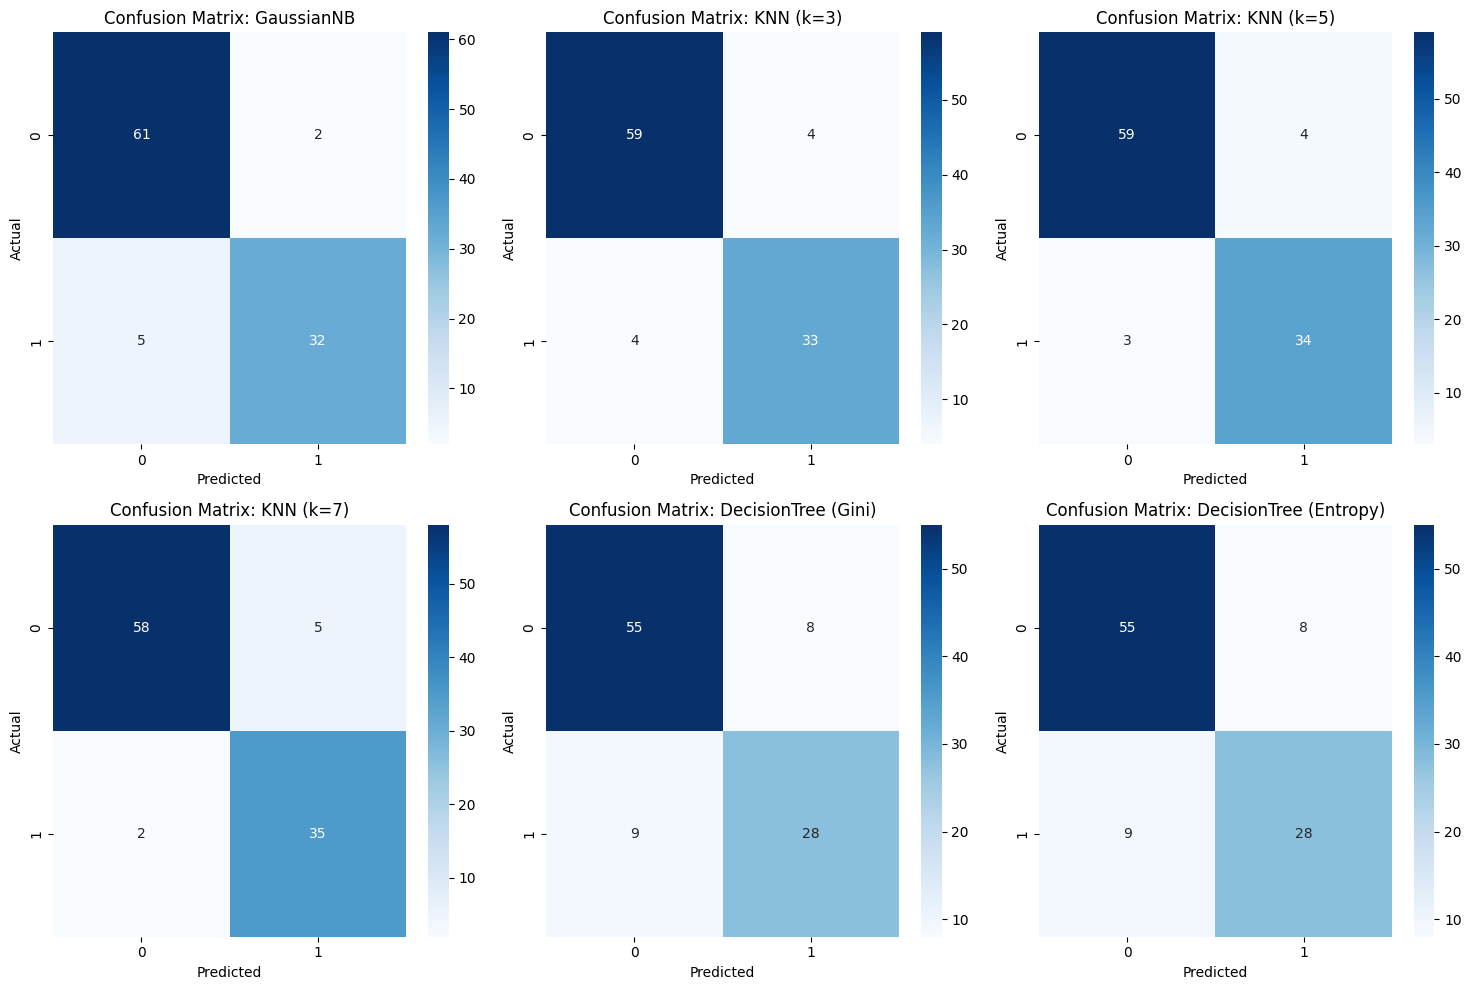

In [118]:
import seaborn as sns

# Store results
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Confusion Matrix': cm
    }

# Print evaluation results
for name, metrics in results.items():
    print(f"\nModel: {name}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"Precision: {metrics['Precision']:.2f}")
    print(f"Recall: {metrics['Recall']:.2f}")
    print(f"F1 Score: {metrics['F1-Score']:.2f}")
    print("Confusion Matrix:\n", metrics['Confusion Matrix'])

# Plot confusion matrices from results dictionary
plt.figure(figsize=(15, 10))

for i, (name, metrics) in enumerate(results.items(), 1):
    plt.subplot(2, 3, i)
    sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


Plot decision boundaries (optional but encouraged for 2D features).

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/di

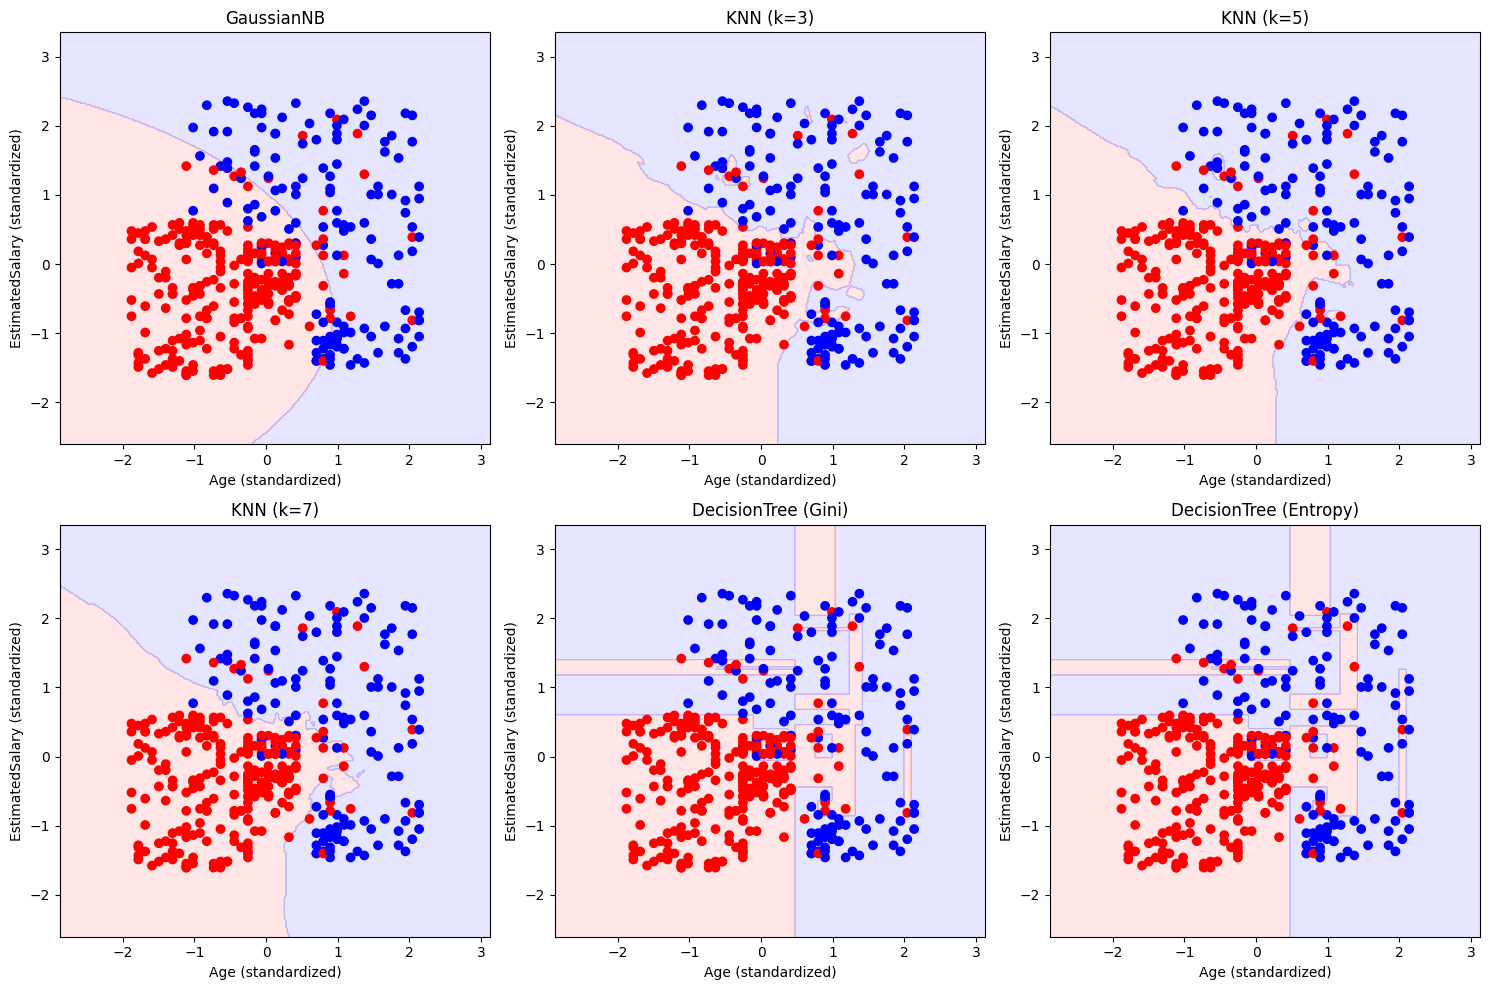

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Plot decision boundaries (using Age and EstimatedSalary)
def plot_decision_boundary(model, X, y, title):
    X_plot = X[['Age', 'EstimatedSalary']].values
    h = 0.02  # Step size
    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # FIX: Only use two features here
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.3)
    plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']))
    plt.xlabel('Age (standardized)')
    plt.ylabel('EstimatedSalary (standardized)')
    plt.title(title)


# Plot decision boundaries for each model
plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 3, i)
    plot_decision_boundary(model,X, y, name)

plt.tight_layout()
plt.show()


Compare models and identify which one performs best and why.


**Model Performance Comparison and Analysis**


This report compares three classification models — Gaussian Naive Bayes, K-Nearest Neighbors (KNN), and Decision Tree — on a binary classification task using metrics such as Accuracy, Precision, Recall, F1 Score, and Confusion Matrix.


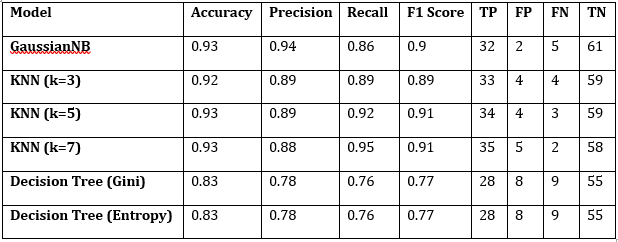

**Key Observations**


•	**Best Performing Model (Overall):** KNN (k=5) and KNN (k=7) both perform best in terms of F1 Score (0.91), showing a strong balance between precision and recall.

---


•	**GaussianNB Strength:** GaussianNB has the highest precision (0.94), making it suitable for cases where false positives are costly. It has high accuracy and F1 Score but a slightly lower recall.

---


•	**KNN Trend:** KNN improves recall as k increases (k=3 to k=7), but precision drops slightly, with F1 Score remaining steady.

---


•	**Decision Tree Limitation:** Decision Trees underperform, with lower accuracy and F1 scores. Both Gini and Entropy produce identical results and may be overfitting.

---




**Conclusion**

---
The best-performing models in this comparison are KNN with k=5 or k=7, due to their balanced and high scores across all metrics.


•	Choose KNN (k=5) if you prefer slightly better precision.

•	Choose KNN (k=7) if recall is more critical (e.g., you want to minimize false negatives).


Gaussian Naive Bayes is a close second, especially if model simplicity and speed are required.

Decision Trees underperform across the board and are not recommended for this dataset.

